# Animation de Percussion 1D

In [131]:
import numpy as np
from scipy.integrate import odeint
from scipy.integrate import quad

import matplotlib.pyplot as plt
from matplotlib.patches import Circle

from IPython.display import Image, Video
from ipywidgets import interact

import imageio, io
from pathlib import Path
import glob, os
from natsort import natsorted
import PIL.Image as PILImage

Ce notebook présente une animation de la percussion entre deux floes.

In [107]:
Image("../reports/internship/Figures/Percussion1D-Systeme-3.png")

FileNotFoundError: No such file or directory: '../reports/internship/Figures/Percussion1D-Systeme-3.png'

FileNotFoundError: No such file or directory: '../reports/internship/Figures/Percussion1D-Systeme-3.png'

<IPython.core.display.Image object>

Les étapes à suivre:
1. Definir les constantes. Le temps se divise en deux:
    - Le temps avant le choc 
    - Le temps après le choc
2. Calculer les positions (avant et après le choc). On commence simplement avec un mouvement uniforme avant le choc
3. Une fonction pour dessiner un ressort
4. Une fonction pour dessiner un dispositif visqueux (inutile pour l'instant)
5. Une fonction pour dessiner un floe 1D au temps step
6. Faire les graphiques et les placer dans la liste au fur et à mesure

A corriger aujoudh'ui:
1. Corrgier le plots (limites, etc..)
2. Mettre tout ca dans une fonction
3. Placer les sliders de notebook
4. Implementer la deuxième phase

In [108]:
## Problem constants
m = 1.0
m_ = 1.0

k = 16.0
k_ = 5.0

mu = 6.0
mu_ = 2.0

v0=0.1 
v_0=1.8 
eps=0.8, 

N=2000
tminus=0.0 
tplus=1.0
tmax= 5.0
t = np.linspace(0, tmax/2.0, N+1)
dt = tmax / N

In [109]:
## Geometric constants
L = 10.0
H = 5.0

Ls = L/10.0     # Spring 1 length at rest 
Ls_ = L/10.0    # Spring 2 length at rest

R = L/20.0      # Radius for the balls at the end of the springs

z0 = 0
z_0 = L-Ls_

In [110]:
## Positions of the first ice-floe before collision
def uniform_mouvement_1(y,t):
    return v0
z = odeint(uniform_mouvement_1, z0, t)[:,0]

## Positions of the second ice-floe before collision
def uniform_mouvement_2(y,t):
    return -v_0
z_ = odeint(uniform_mouvement_2, z_0, t)[:,0]

In [111]:
## Une fonction pour dessiner un ressort
def plot_spring(x, y, theta, L, H, ax):
    """ Plot the spring from (x,y) with length L and height H as the projection of a helix."""
    # Spring turn radius, number of turns
    rs, ns = 0.05, 25
    # Number of data points for the helix
    Ns = 1000
    # We don't draw coils all the way to the end of the pendulum:
    # pad a bit from the anchor and from the bob by these number of points
    ipad1, ipad2 = 100, 150
    w = np.linspace(0, L, Ns)
    # Set up the helix along the x-axis ...
    xp = np.zeros(Ns)
    xp[ipad1:-ipad2] = rs * np.sin(2*np.pi * ns * w[ipad1:-ipad2] / L)
    # ... then rotate it to align with  the pendulum and plot.
    R = np.array([[np.cos(theta), -np.sin(theta)],
                  [np.sin(theta), np.cos(theta)]])
    xs, ys = - R @ np.vstack((xp, w))
    ax.plot(x+xs, y+(H*ys)/np.max(ys), c='k', lw=2)

# fig = plt.figure(figsize=(10, 10), dpi=72)
# ax = fig.add_subplot(111)
# plot_spring(5,0,np.pi/2,4, 2,ax)

In [112]:
def plot_circle(x, y, R, ax):
    # Circle at position (x,y) with radius R
    c = Circle((x, y), R, fc='k', zorder=10)
    ax.add_patch(c)

def plot_ice_floe(x1,y1, x2,y2, R, ax):
    """ Plot an ice floe whose nodes are at (x1,y1) and (x2,y2) with same radius R """
    plot_circle(x1,y1,R,ax)
    plot_circle(x2,y2,R,ax)
    if x1 > x2:
        tmp = x2
        x2 = x1
        x1 = tmp
    elif x1 == x2:
        print("Zero sized spring!")

    plot_spring(x1+R/2, 0, np.pi/2, x2-x1-R, R/1.2, ax)



# fig = plt.figure(figsize=(10, 5), dpi=72)
# ax = fig.add_subplot(111)
# ax.axis("equal")
#
# # plot_circle(5,0,1,ax)
# # plot_spring(5,0,np.pi/2,4, 0.5,ax)
# # plot_ice_floe(1,0, 8,0, 1, ax)
# plot_ice_floe(1,0, 1,0, 0.25, ax)
# plt.show()

In [113]:
""" Clear the given directory of all PNG files """
def clear_dir(path):
    files = glob.glob(path+'/*.png', recursive=True)
    for f in files:
        try:
            os.remove(f)
        except OSError as e:
            print("Error: %s : %s" % (f, e.strerror))

In [133]:
def fig2img(fig):
    """ Convert a Matplotlib figure to a PIL Image and return it """
    buf = io.BytesIO()
    fig.savefig(buf)
    buf.seek(0)
    img = PILImage.open(buf)
    # img = plt.imread(buf)
    return img


In [138]:
def make_plot(i, path, ax):
    """
    Plot and save an image of the system configuration for time point i.
    """
    plot_ice_floe(z[i],0, z[i]+Ls,0, R, ax)
    plot_ice_floe(z_[i],0, z_[i]+Ls_,0, R, ax)

    # Centre the image on the fixed anchor point, and ensure the axes are equal
    # ax.set_xlim(-np.max(L)-r, np.max(L)+r)
    # ax.set_ylim(-np.max(L)-r, np.max(L)+r)
    ax.set_aspect('equal', adjustable='box')
    # plt.axis('off')
    # plt.savefig(path+'/_img{:04d}.png'.format(i//di), dpi=72)
    img_list.append(fig2img(fig))
    # Clear the Axes ready for the next image.
    plt.cla()

0 / 50
1 / 50
2 / 50
3 / 50
4 / 50
5 / 50
6 / 50
7 / 50
8 / 50
9 / 50
10 / 50
11 / 50
12 / 50
13 / 50
14 / 50
15 / 50
16 / 50
17 / 50
18 / 50
19 / 50
20 / 50
21 / 50
22 / 50
23 / 50
24 / 50
25 / 50
26 / 50
27 / 50
28 / 50
29 / 50
30 / 50
31 / 50
32 / 50
33 / 50
34 / 50
35 / 50
36 / 50
37 / 50
38 / 50
39 / 50
40 / 50
41 / 50
42 / 50
43 / 50
44 / 50
45 / 50
46 / 50
47 / 50
48 / 50
49 / 50
50 / 50


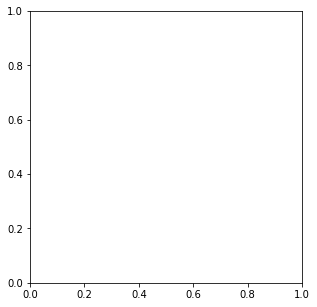

In [139]:
"""
# Make an image every di time points, corresponding to a frame rate of fps
"""
path = "frames"
fps = 10
di = int(1/fps/dt)
# This figure size (inches) and dpi give an image of .
fig = plt.figure(figsize=(L, H), dpi=72)
ax = fig.add_subplot(111)

clear_dir(path)
img_list = []

for i in range(0, t.size, di):
    print(i // di, '/', t.size // di)
    make_plot(i, path, ax)


In [140]:
# imageio.mimwrite('Animation1D.gif', image_list, loop=3, duration=total_duration/nb_frames)
imageio.mimwrite('Animation1D.gif', img_list)

In [141]:
# Image("Animation1D.gif")
os.system('eog Animation1D.gif')     ## Only on Linux GNOME


0

In [ ]:
""" A partir d'ici il faut faire la sauvegarde sur le disque """








In [93]:
""" Read the image from memory """
image_path = Path('./frames')
images_paths = list(image_path.glob('*.png'))

image_names = []
for file_name in images_paths:
    image_names.append(str(file_name))
image_names = natsorted(image_names)

image_list = []
for file_name in image_names:
    image_list.append(imageio.imread(file_name))

print(image_names[:5])

['frames/_img0000.png', 'frames/_img0001.png', 'frames/_img0002.png', 'frames/_img0003.png', 'frames/_img0004.png']


In [94]:
# nb_frames = len(image_list)
# total_duration = 10.0
# fps = nb_frames * 100 / total_duration
#
# imageio.mimwrite('Animation1D.gif', image_list, loop=3, duration=total_duration/nb_frames)
imageio.mimwrite('Animation1D.gif', image_list)

In [104]:
# Image("Animation1D.gif")
os.system('eog Animation1D.gif')     ## Only on Linux GNOME

0